# Exploratory analysis of Transit Peace Officer calls

Imports

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sys
import os

# Add the subfolder containing the Python file to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'calgary_project')))
import eda_plot_funcs as epf
from eda_plot_funcs import plot_yearly_sum_trend, plot_seasonal_and_total_trends
import other_funcs

Load data

In [67]:
# Load the CSV file
file_path = "../data/raw/Community_Crime_Statistics_20240625.csv"

df = pd.read_csv(file_path,)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[df['year'] != 2024]
df.dtypes

community      object
category       object
crime_count     int64
year            int64
month           int64
dtype: object

In [68]:
sum_crime_per_month = df.groupby(['year', 'month'])['crime_count'].sum().reset_index()
sum_crime_per_month = other_funcs.get_seasons(sum_crime_per_month)
sum_crime_per_month.head()

,year,month,crime_count,season
0,2018,1,2815,Winter
1,2018,2,2279,Winter
2,2018,3,2581,Spring
3,2018,4,2643,Spring
4,2018,5,3066,Spring


How do the total crime counts per month change over the years?

In [69]:
yearly_sum = sum_crime_per_month.groupby('year')['crime_count'].sum()#.reset_index()
yearly_sum = yearly_sum.reset_index()
yearly_sum

,year,crime_count
0,2018,35437
1,2019,38299
2,2020,31918
3,2021,28573
4,2022,33014
5,2023,27973


Plot crime count timeline

c:\Users\gotat\Documents\python\portfolio\calgary\calgary_project\calgary_project\eda_plot_funcs.py:97: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(ax=ax1, data=seasonal_trends, x='year', y=y, hue='season', estimator='sum', palette=palette, markers=True, linewidth=3, markersize=10, style='season')


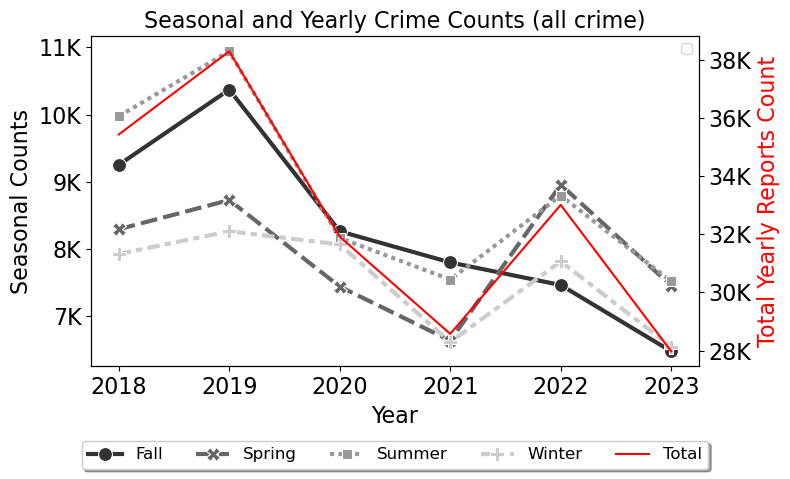

In [70]:
plot_seasonal_and_total_trends(sum_crime_per_month, yearly_sum, title='Seasonal and Yearly Crime Counts (all crime)', save_png=True, population='ALL')

Total crime counts appear to decrease. Let's look at yearly totals.

Indeed, total crime counts appear to decrease. Why are the people of Calgary then so concerned about transit related crime?

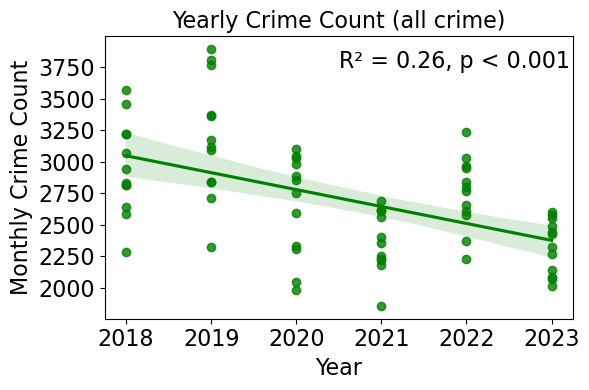

In [71]:
plot_yearly_sum_trend(sum_crime_per_month, title='Yearly Crime Count (all crime)', align=['top', 'left'], color='green', save_png=True, category='total')

How about violent crime only?

In [72]:
df.category.unique()

array(['Assault (Non-domestic)', 'Break & Enter - Commercial',
       'Break & Enter - Dwelling', 'Theft FROM Vehicle',
       'Theft OF Vehicle', "Violence\xa0 'Other' (Non-domestic)",
       'Street Robbery', 'Commercial Robbery',
       'Break & Enter - Other Premises'], dtype=object)

In [73]:
cats = [
        'Assault (Non-domestic)', 
        "Violence\xa0 'Other' (Non-domestic)",
        # 'Street Robbery', 
       ]

violent_crime_counts = df[df.category.isin(cats)]
violent_crime_counts = other_funcs.get_seasons(violent_crime_counts)

sum_vc_per_month = violent_crime_counts.groupby(['year', 'month'])['crime_count'].sum().reset_index()
sum_vc_per_month = other_funcs.get_seasons(sum_vc_per_month)

yearly_sum_vc = sum_vc_per_month.groupby(['year'])['crime_count'].sum().reset_index()
yearly_sum_vc

c:\Users\gotat\Documents\python\portfolio\calgary\calgary_project\calgary_project\other_funcs.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'] = data['month'] % 12 // 3 + 1
c:\Users\gotat\Documents\python\portfolio\calgary\calgary_project\calgary_project\other_funcs.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'] = data['season'].map(season_dict)


,year,crime_count
0,2018,5867
1,2019,5927
2,2020,5568
3,2021,6287
4,2022,6325
5,2023,6980


Disregarding theft, breaking & entering, and robbery there is a upward trending crime count for assault and other (non-domestic) violence.

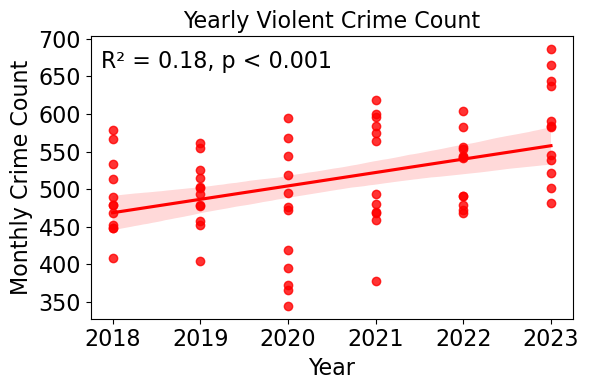

In [74]:
plot_yearly_sum_trend(sum_vc_per_month, title='Yearly Violent Crime Count', save_png=True, category='violent', color='red')

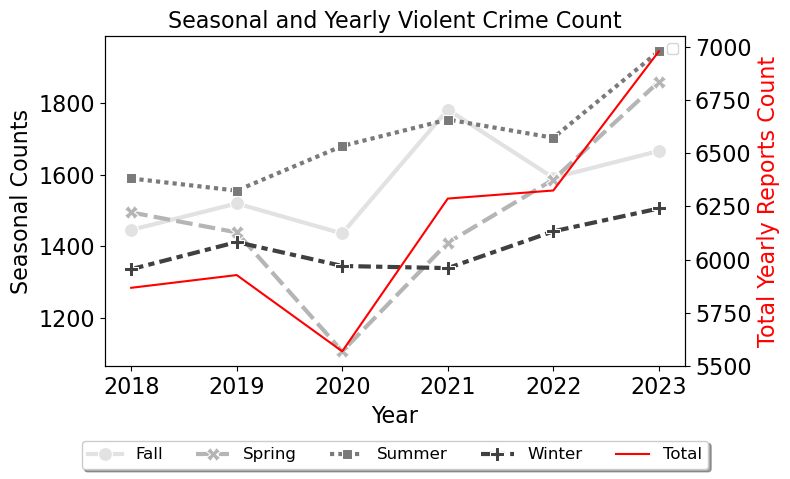

In [75]:
plot_seasonal_and_total_trends( sum_vc_per_month, yearly_sum_vc, title='Seasonal and Yearly Violent Crime Count', palette='Greys', save_png=True, population='violent')

Since this is not transit related data specific, it would be interesting to see if there is an upwards trend in Transit Peace Officer calls as well and of which nature these are.